<a href="https://colab.research.google.com/github/TasyaFitriaAnggraini/Prediction-Heart-Disease-Random-Forest-KNN/blob/main/Klasifikasi%20Heart%20Disease%20RF%20dan%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASYA FITRIA ANGGRAINI 4611421023

JUDUL PENELITIAN/PAPER : KLASIFIKASI UNTUK PREDIKSI PENYAKIT JANTUNG MENGGUNAKAN MACHINE LEARNING DENGAN ALGORITMA RANDOM FOREST DAN K NEAREST NEIGHBORS 

## **INTODUCTION**


Di antara semua organ, Jantung adalah bagian yang penting dalam tubuh kita. Jantung berdetak sekitar 2,5 miliar kali selama rata-rata umur hidup, mendorong jutaan galon darah ke setiap bagian tubuh.

Di era ini, penyakit jantung meningkat setiap hari akibat gaya hidup dan makanan modern. Diagnosis penyakit jantung adalah tugas yang menantang. Model klasifikasi ini akan memprediksi apakah pasien memiliki penyakit jantung atau tidak berdasarkan berbagai kondisi/gejala tubuh mereka.

# **DATA DESCRIPTION**

Proyek ini akan fokus pada prediksi penyakit jantung menggunakan Random Forest dan K Nearest Neighbor. Proyek ini akan menggunakan kumpulan data (dataset) sebanyak 303 pasien yang didistribusikan oleh UCI Machine Learning Repository.Berdasarkan atribut-atribut seperti dibawah ini

1. age
2. sex
3. cp (chest pain type) (4 values)
4. trestbps (resting blood pressure)
5. chol (serum cholestoral in mg/dl)
6. fbs (fasting blood sugar) > 120 mg/dl
7. restecg (resting electrocardiographic results) (values 0,1,2)
8. thalach (maximum heart rate achieved)
9. exang (exercise induced angina)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target - is the binary target variable, 0 indicates that the patient has heart disease, the value is 1 if not.


# **IMPORT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


# **Exploratory Data Analysis (EDA)**


Analisis Data Eksploratori (EDA) adalah proses untuk memahami dan menganalisis dataset sebelum melakukan pemodelan atau prediksi. Dalam EDA, kita dapat melakukan berbagai tugas seperti memeriksa struktur data, mengeksplorasi statistik deskriptif, mencari hubungan antar variabel, dan mengidentifikasi pola atau anomali.

In [2]:
dataset = pd.read_csv("//content/drive/MyDrive/Colab Notebooks/heart (1).csv")

In [3]:
#Mengetahui Tipe Objek dari suatu Variabel
type(dataset)

pandas.core.frame.DataFrame

In [4]:
#Mengetahui Jumlah Kolom Baris dalam Dataset
dataset.shape

(303, 14)

In [5]:
#Menampilkan 5 Baris Pertama dari Dataset
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#Memilih Baris Tertentu dalam Dataset berdasarkan Indeks Baris yang Diberikan
rows_to_display = [248, 147, 239, 4, 7]
selected_rows = dataset.iloc[rows_to_display]

print(selected_rows)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
248   54    1   1       192   283    0        0      195      0      0.0   
147   60    0   3       150   240    0        1      171      0      0.9   
239   35    1   0       126   282    0        0      156      1      0.0   
4     57    0   0       120   354    0        1      163      1      0.6   
7     44    1   1       120   263    0        1      173      0      0.0   

     slope  ca  thal  target  
248      2   1     3       0  
147      2   0     2       1  
239      2   0     3       0  
4        2   0     2       1  
7        2   0     3       1  


In [7]:
#Menghasilkan Ringkasan Statistik dari Dataset
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

# **Visualization Of Categorical Features**

Visualisasi fitur kategorikal adalah metode untuk menggambarkan dan memahami hubungan antara fitur kategorikal dalam dataset. Ini membantu kita memperoleh wawasan tentang distribusi dan pola kategori dalam fitur yang terlibat.

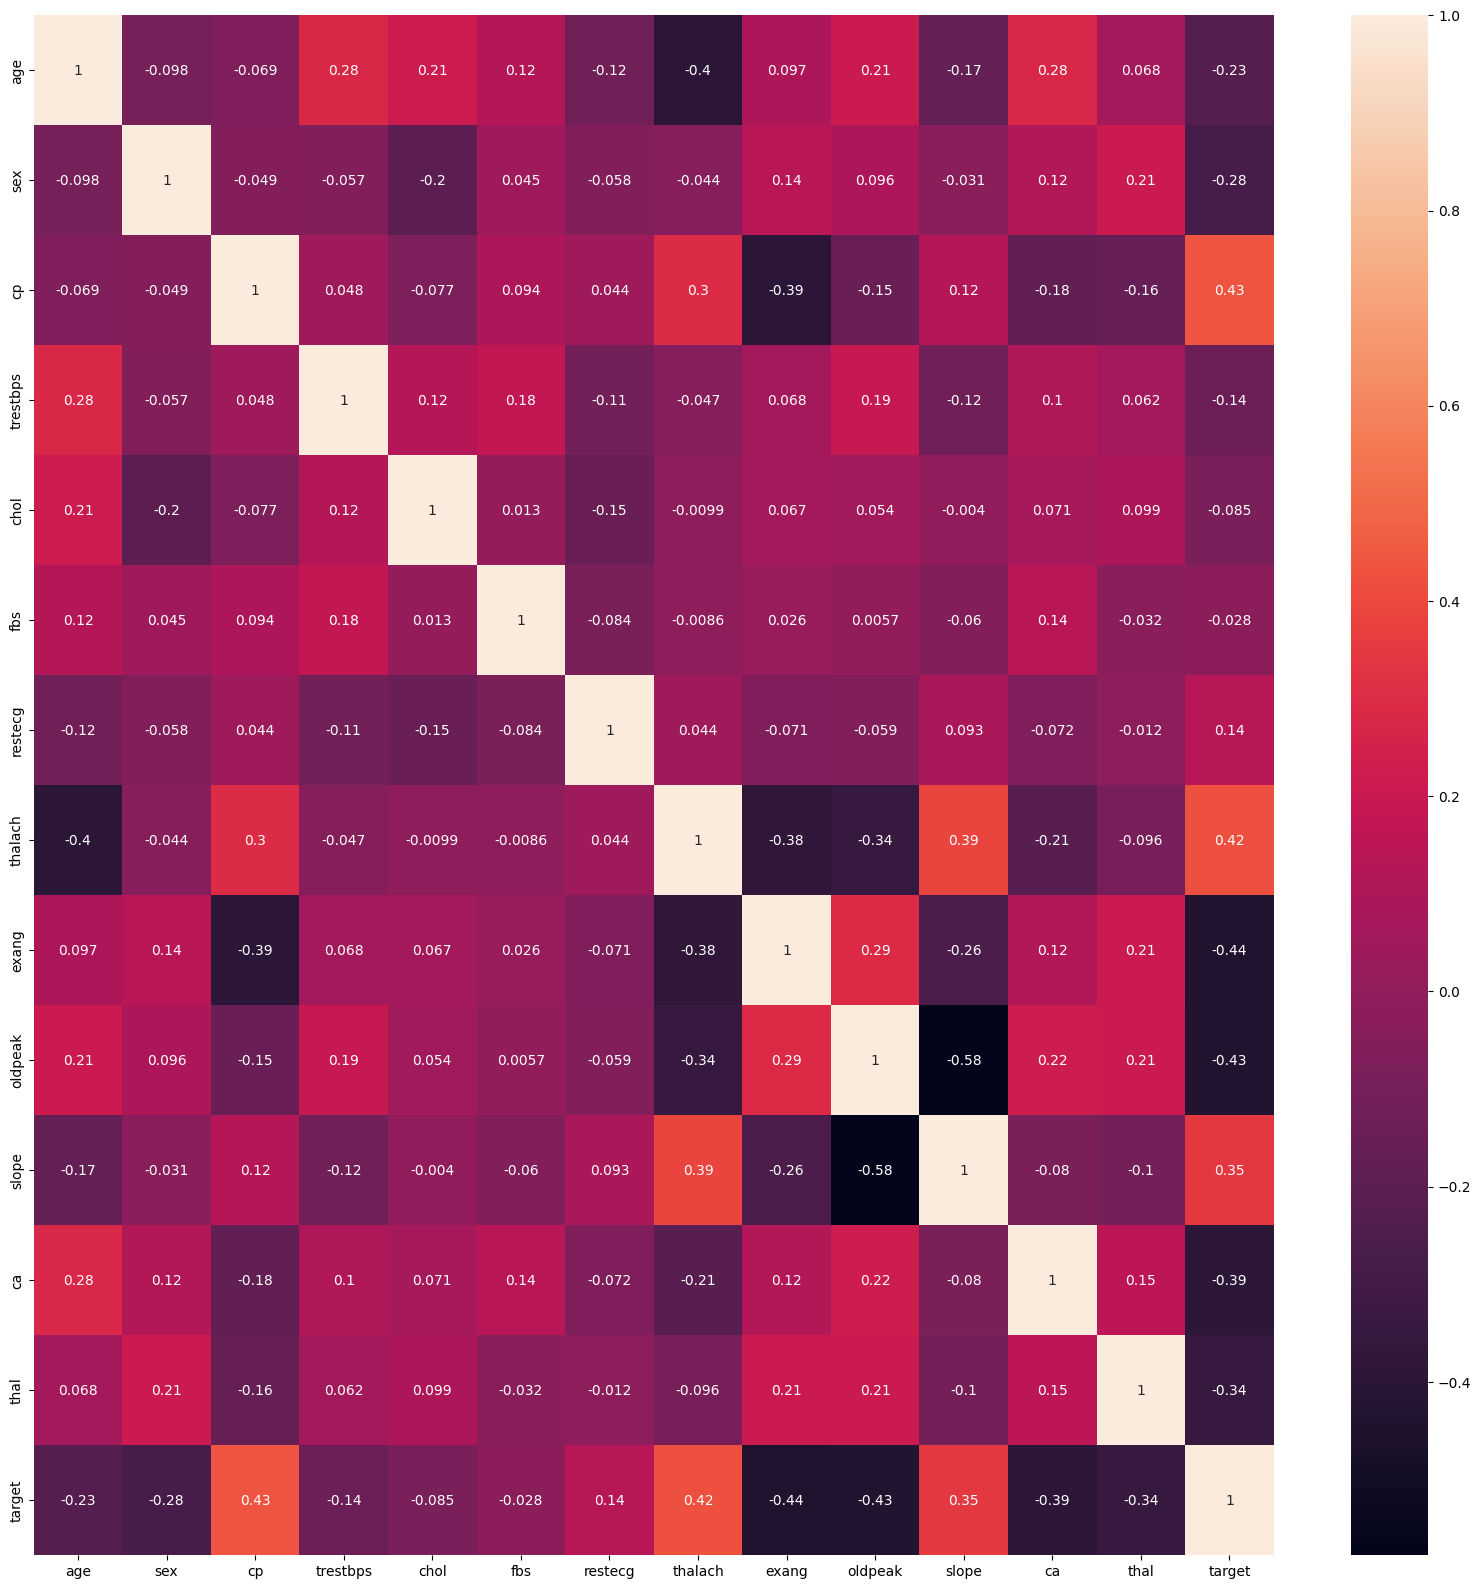

In [22]:
#Heatmap yang Memvisualisasikan Tingkat Korelasi antar Kolom Numerik dalam Dataset
corrmat=dataset.corr()
tf=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dataset[tf].corr(),annot=True)

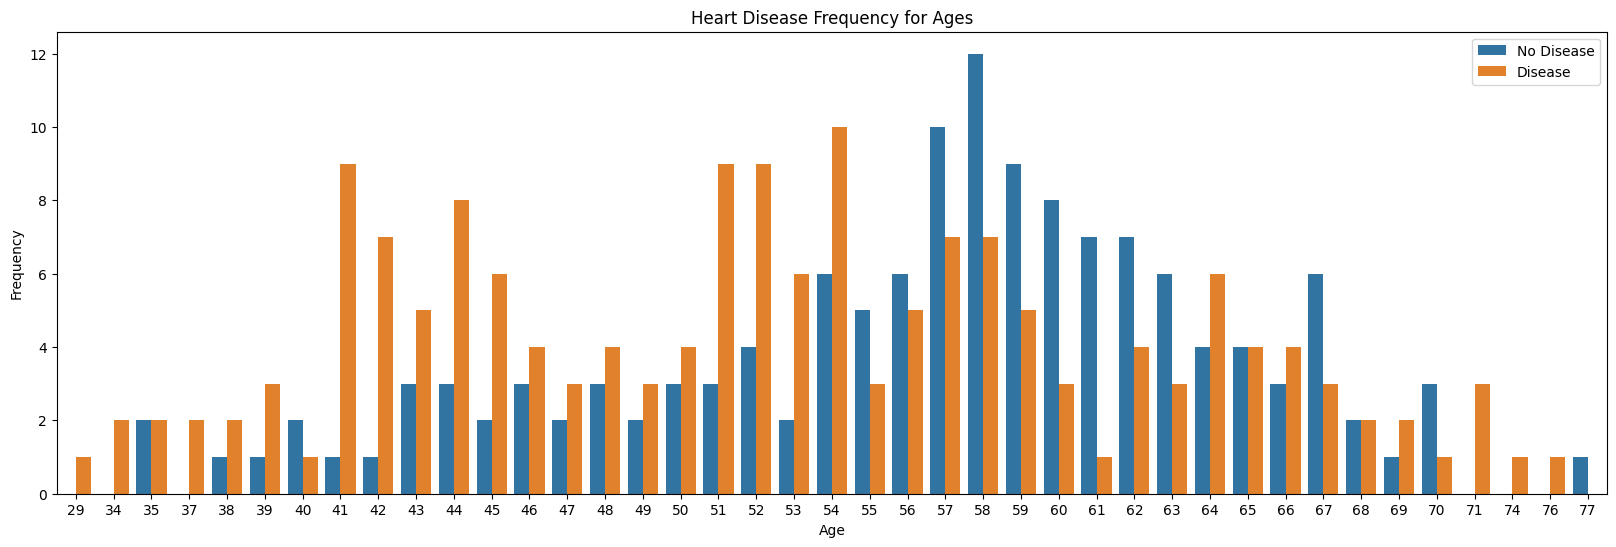

In [20]:
#Memperlihatkan Heart Disease Frequenzy untuk Age
def plotHeartDiseaseFrequency():
    plt.figure(figsize=(20, 6))
    sns.countplot(x='age', hue='target', data=dataset)
    plt.title("Heart Disease Frequency for Ages")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.legend(['No Disease', 'Disease'])
    plt.show()

plotHeartDiseaseFrequency()


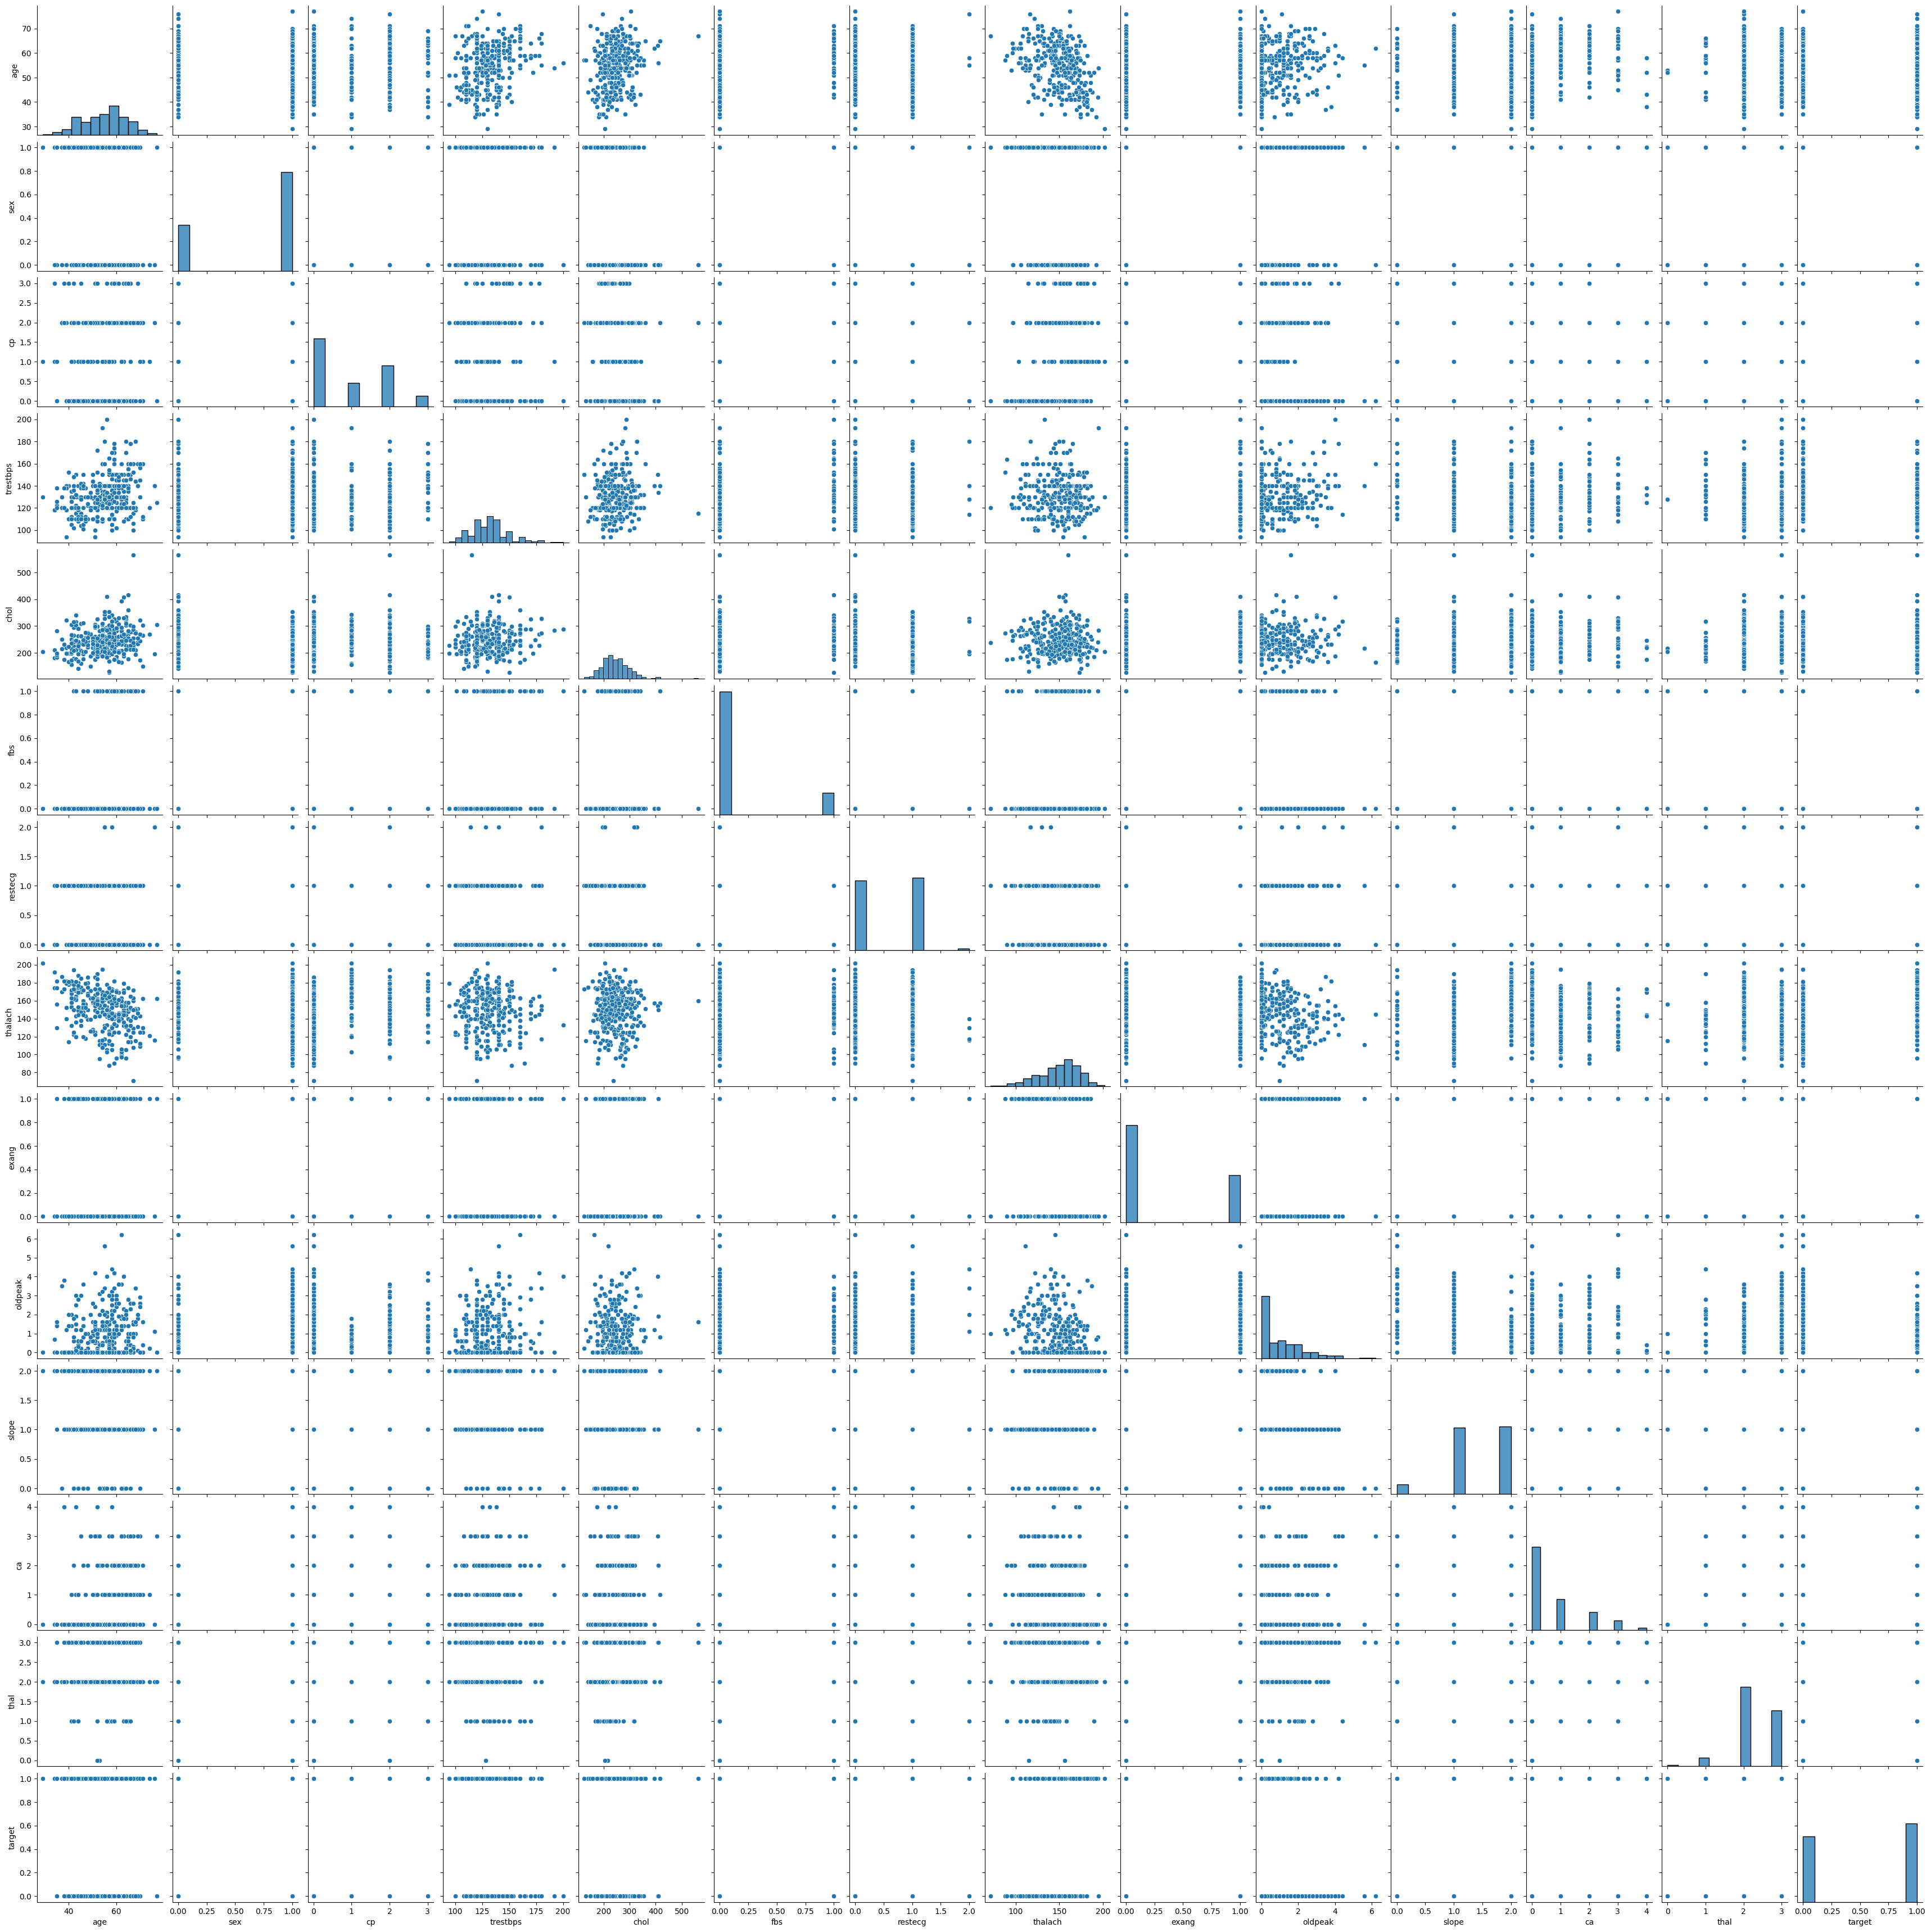

In [19]:
#Membuat Matriks PlotSebar(Scatter Plot) dari Dataset
sns.pairplot(dataset)

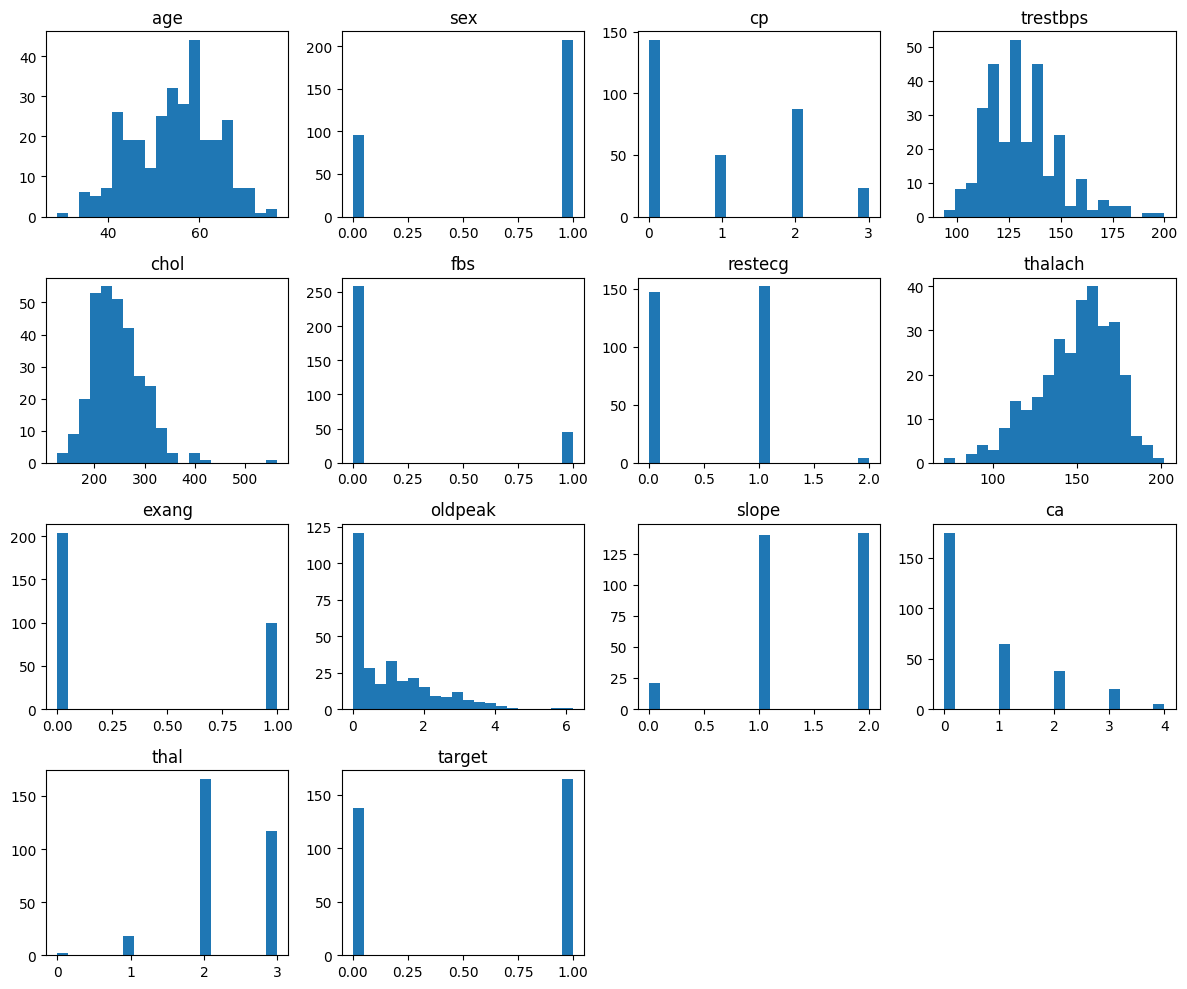

In [26]:
#Memperlihatkan Semua Variabel pada Dataset
dataset.hist(figsize=(12, 10), bins=20, grid=False)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

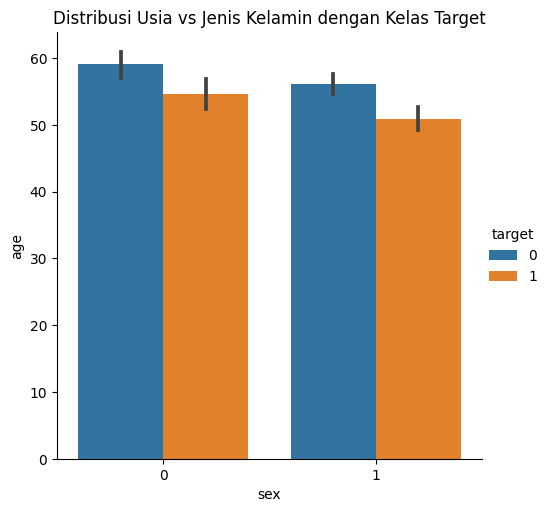

In [30]:
#Distribusi Usia (age) vs Jenis Kelamin (Sex) dengan Kelas Target (target)
plt.figure(figsize=(10, 6))
sns.catplot(kind='bar', data=dataset, y='age', x='sex', hue='target')
plt.title('Distribusi Usia vs Jenis Kelamin dengan Kelas Target')
plt.show()

<Figure size 1000x600 with 0 Axes>

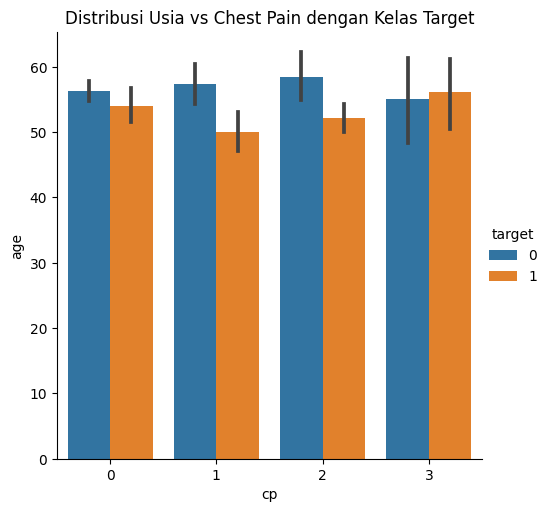

In [34]:
#Distribusi Usia (age) vs Chest Pain dengan Kelas Target (target)
plt.figure(figsize=(10, 6))
sns.catplot(kind='bar', data=dataset, y='age', x='cp', hue='target')
plt.title('Distribusi Usia vs Chest Pain dengan Kelas Target')
plt.show()

<Figure size 1000x600 with 0 Axes>

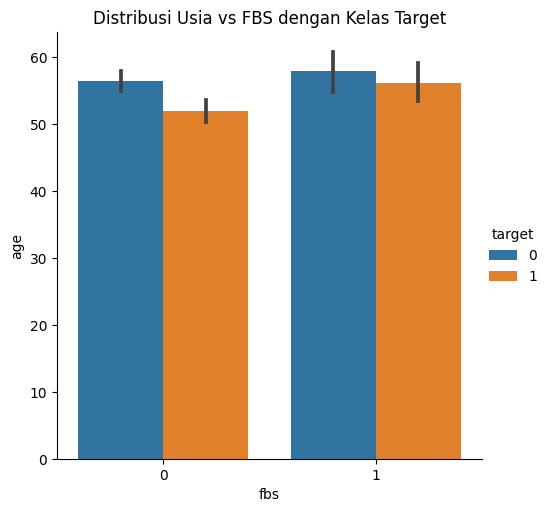

In [35]:
#Distribusi Usia (age) vs fbs dengan Kelas Target (target)
plt.figure(figsize=(10, 6))
sns.catplot(kind='bar', data=dataset, y='age', x='fbs', hue='target')
plt.title('Distribusi Usia vs FBS dengan Kelas Target')
plt.show()

<Figure size 1000x600 with 0 Axes>

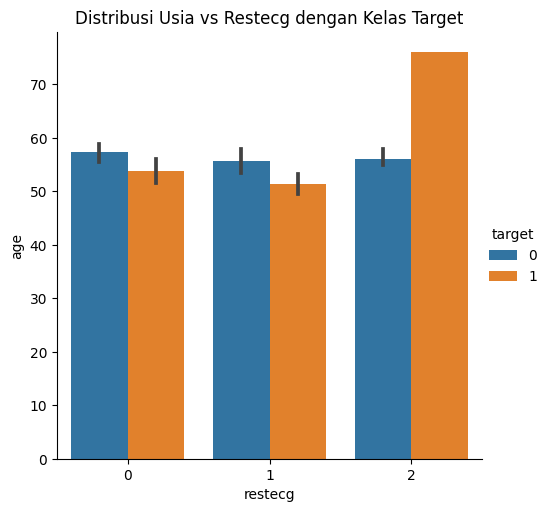

In [36]:
#Distribusi Usia (age) vs Restecg dengan Kelas Target (target)
plt.figure(figsize=(10, 6))
sns.catplot(kind='bar', data=dataset, y='age', x='restecg', hue='target')
plt.title('Distribusi Usia vs Restecg dengan Kelas Target')
plt.show()

<Figure size 1000x600 with 0 Axes>

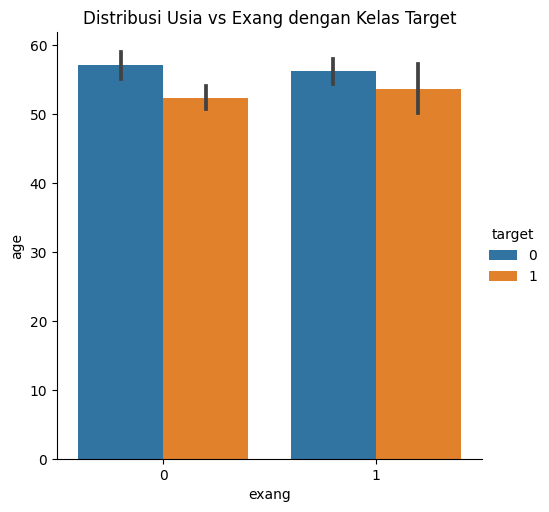

In [37]:
#Distribusi Usia (age) vs Exang dengan Kelas Target (target)
plt.figure(figsize=(10, 6))
sns.catplot(kind='bar', data=dataset, y='age', x='exang', hue='target')
plt.title('Distribusi Usia vs Exang dengan Kelas Target')
plt.show()

<Figure size 1000x600 with 0 Axes>

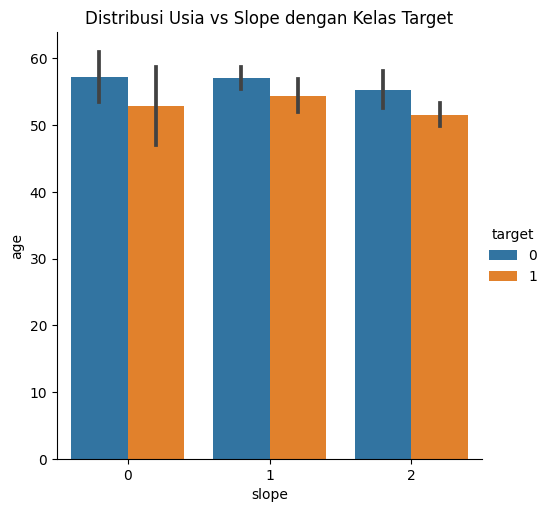

In [38]:
#Distribusi Usia (age) vs Slope dengan Kelas Target (target)
plt.figure(figsize=(10, 6))
sns.catplot(kind='bar', data=dataset, y='age', x='slope', hue='target')
plt.title('Distribusi Usia vs Slope dengan Kelas Target')
plt.show()

<Figure size 1000x600 with 0 Axes>

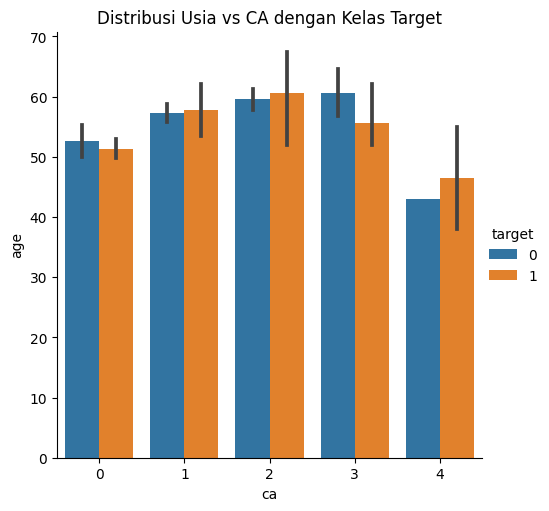

In [39]:
#Distribusi Usia (age) vs CA dengan Kelas Target (target)
plt.figure(figsize=(10, 6))
sns.catplot(kind='bar', data=dataset, y='age', x='ca', hue='target')
plt.title('Distribusi Usia vs CA dengan Kelas Target')
plt.show()

<Figure size 1000x600 with 0 Axes>

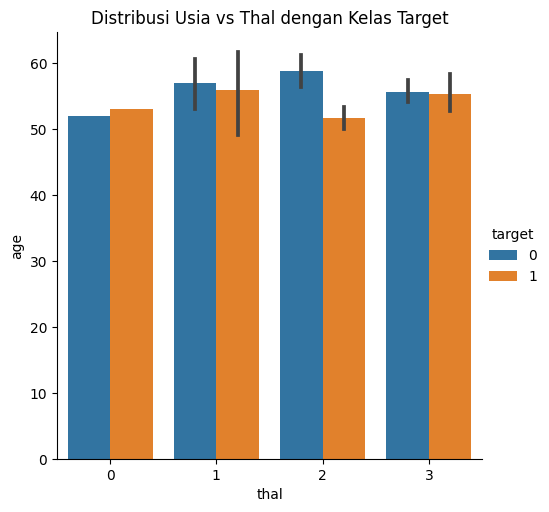

In [40]:
#Distribusi Usia (age) vs Thal dengan Kelas Target (target)
plt.figure(figsize=(10, 6))
sns.catplot(kind='bar', data=dataset, y='age', x='thal', hue='target')
plt.title('Distribusi Usia vs Thal dengan Kelas Target')
plt.show()

<Axes: xlabel='thal', ylabel='Density'>

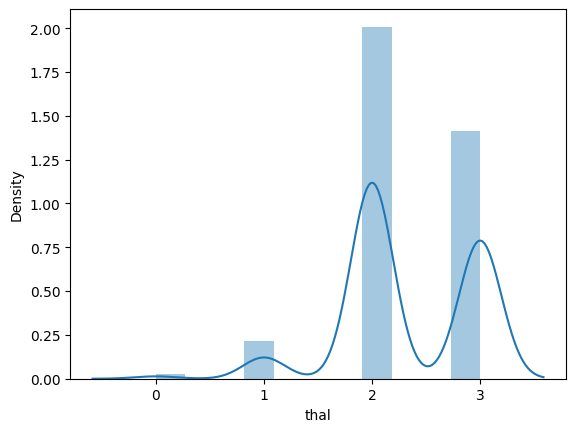

In [41]:
sns.distplot(dataset["thal"])

# **DATA PREPOCESSING**
MEMBAGI DATA TRAINING DAN DATA TESTING

In [46]:
#Mempersiapkan Data sebelum Melatih Model
x=dataset.drop('target', axis=1)
y=dataset['target']
x=x.drop('oldpeak', axis=1)
x=pd.get_dummies(x,columns=['sex'], drop_first=True)
x.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,sex_1
0,63,3,145,233,1,0,150,0,0,0,1,1
1,37,2,130,250,0,1,187,0,0,0,2,1
2,41,1,130,204,0,0,172,0,2,0,2,0
3,56,1,120,236,0,1,178,0,2,0,2,1
4,57,0,120,354,0,1,163,1,2,0,2,0


In [50]:
#Melakukan Penskalaan Fitur pada Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Menstandarisasi fitur-fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [52]:
#Melihat Data Training dan Data Testing
print("Data Pelatihan:")
print("X_train:")
print(X_train)
print("y_train:")
print(y_train)

print("\nData Pengujian:")
print("X_test:")
print(X_test)
print("y_test:")
print(y_test)


Data Pelatihan:
X_train:
[[-1.35679832  0.00809909 -0.61685555 ... -0.68970073 -0.50904773
   0.72250438]
 [ 0.38508599 -0.97189094  1.1694912  ... -0.68970073  1.17848036
   0.72250438]
 [-0.92132724  0.98808912  1.1694912  ... -0.68970073 -0.50904773
   0.72250438]
 ...
 [ 1.58263146  1.96807914  1.76494012 ...  0.32186034 -0.50904773
   0.72250438]
 [-0.92132724 -0.97189094 -0.61685555 ... -0.68970073  1.17848036
   0.72250438]
 [ 0.92942484  0.00809909  0.57404228 ...  1.33342142 -0.50904773
  -1.38407465]]
y_train:
132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Data Pengujian:
X_test:
[[ 2.76218225e-01 -9.71890936e-01  1.16949120e+00  5.53408401e-01
  -3.83300706e-01 -1.04610909e+00 -1.70875171e+00  1.47790748e+00
  -6.94988026e-01  3.21860343e-01 -2.19657581e+00  7.22504380e-01]
 [ 4.93953764e-01  1.96807914e+00  2.36038903e+00  7.81171723e-01
  -3.83300706e-01 -1.04610909e+00  3.98288831

# **KLASIFIKASI ALGORITMA RANDOM FOREST**

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rand_forest, param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [54]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_features='auto', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=1200,
                       random_state=42)

In [55]:
rand_forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

rand_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=90, max_features='auto', min_samples_split=5)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [58]:
print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.35%
_______________________________________________
Classification Report:	Precision Score: 98.50%
			Recall Score: 98.50%
			F1 score: 98.50%
_______________________________________________
Confusion Matrix: 
 [[107   2]
 [  2 131]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
Classification Report:	Precision Score: 87.50%
			Recall Score: 87.50%
			F1 score: 87.50%
_______________________________________________
Confusion Matrix: 
 [[25  4]
 [ 4 28]]



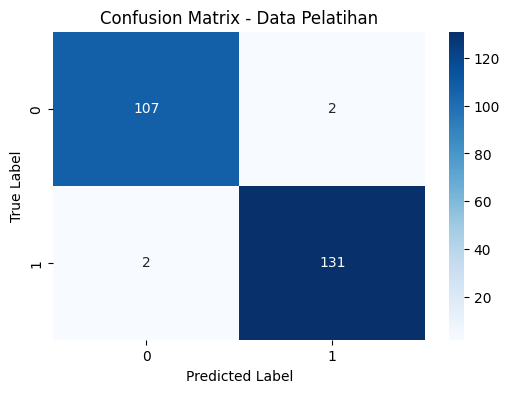

In [65]:
import seaborn as sns

# Confusion matrix for training data
train_pred = rand_forest.predict(X_train)
train_cm = confusion_matrix(y_train, train_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Data Pelatihan')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

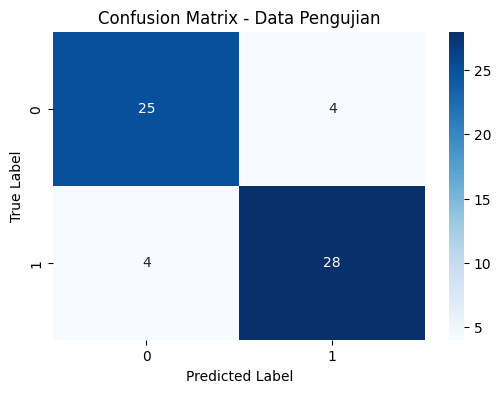

In [66]:
# Confusion matrix for testing data
test_pred = rand_forest.predict(X_test)
test_cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Data Pengujian')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **KLASIFIKASI ALGORITMA K NEAREST NEIGHBOR**

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

scaler=StandardScaler()
x=scaler.fit_transform(x)

n=list(range(1,50,2))
cv=[]

for k in n:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    cv.append(score.mean())

cv

mse = [1- x for x in cv] 
mse

optimal = n[mse.index(min(mse))]

optimal

9

In [71]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

prediction=knn.predict(X_test)

In [81]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {knn_scores[7] * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {knn_scores[7] * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [84]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_classifier.fit(X_train, y_train)

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 90.16%
_______________________________________________
Classification Report:	Precision Score: 86.72%
			Recall Score: 83.46%
			F1 score: 85.06%
_______________________________________________
Confusion Matrix: 
 [[ 92  17]
 [ 22 111]]

Test Result:
Accuracy Score: 90.16%
_______________________________________________
Classification Report:	Precision Score: 96.43%
			Recall Score: 84.38%
			F1 score: 90.00%
_______________________________________________
Confusion Matrix: 
 [[28  1]
 [ 5 27]]

